In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.isna().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
X=df.iloc[:,3:].values

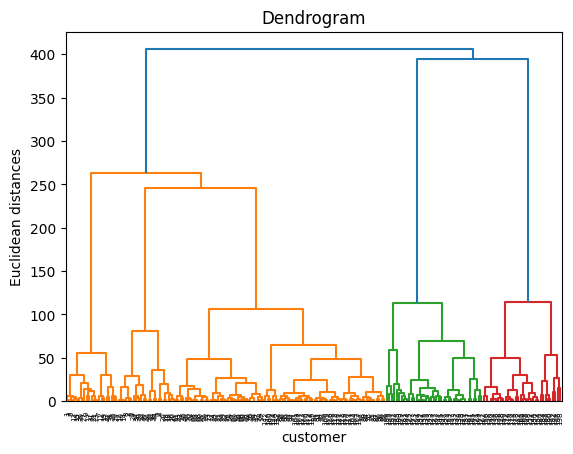

In [ ]:
import scipy.cluster.hierarchy as sch

dendogram = sch.dendrogram(sch.linkage(X, method= 'ward'))
plt.title('Dendrogram')
plt.xlabel('customer')
plt.ylabel('Euclidean distances')
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering
hc= AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
y_hc= hc.fit_predict(X)
y_hc

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

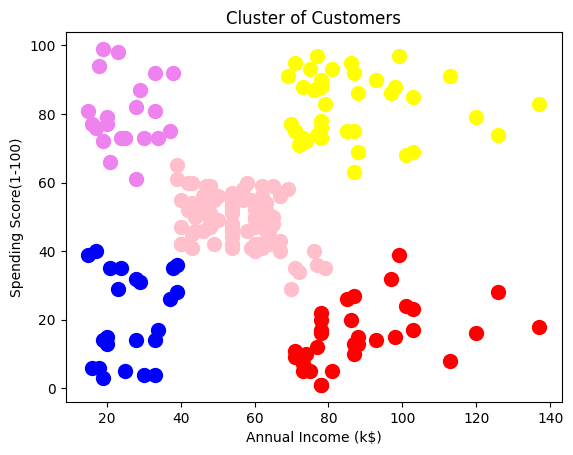

In [ ]:
import numpy as np
plt.scatter(X[y_hc==0, 0], X[y_hc==0, 1], s=100, c='red', label='cluster 1')
plt.scatter(X[y_hc==1, 0], X[y_hc==1, 1], s=100, c='pink', label='cluster 2')
plt.scatter(X[y_hc==2,0], X[y_hc==2, 1], s=100, c='yellow', label='cluster 3')
plt.scatter(X[y_hc==3, 0], X[y_hc==3, 1], s=100, c='violet', label='cluster 4')
plt.scatter(X[y_hc==4, 0], X[y_hc==4, 1], s=100, c='blue', label='cluster 5')
plt.title('Cluster of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score(1-100)')
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

score=silhouette_score(X,y_hc)
print("Silhouette Score for Hierarchial Clustering",score)

Silhouette Score for Hierarchial Clustering 0.5529945955148897
